<a href="https://colab.research.google.com/github/jsstar522/text_mining/blob/master/03_NLP/01_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP
텍스트 분석의 전처리 단계는 다음과 크게 다음 순서로 나눠집니다.
1. Tokenize Text
2. Tag Tokens
3. Lank Tokens

## NLKT
텍스트 토큰화를 위해 **NLKT**(Natural Language Toolkit) 파이썬 패키지를 사용합니다. NLKT는 자연어처리 패키지로 교육용으로 제공되기 때문에 다양한 예제를 쉽게 받아서 테스트해볼 수 있습니다. 

In [0]:
!pip3 install nltk

### Corpus
Corpus는 말뭉치라는 의미입니다. **NLKT는 자연어 분석 처리를 위한 샘플 말뭉치를 제공합니다.** 다음과 같이 말뭉치를 가져올 수 있습니다.

In [6]:
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


저작권이 사라진 문학작품을 불러올 수도 있습니다.

In [7]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

이 중에서 첫번째 문학작품인 **austen-emma.txt** 작품을 불러오겠습니다. raw text 형식으로 저장되어 있습니다. slice로 원하는 부분만 잘라낼 수도 있습니다.

In [19]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:477])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


### Tokenize
긴 문장을 잘게 나누는 작업을 **tokenize**라고 합니다. 작은 단위(token)는 문장이 될 수도 있고 단어가 될 수도 있습니다.

In [21]:
## 문장 tokenize
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:477]))

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."]


0~477개의 문자로 된 문단을 문장 단위로 tokenize 했습니다. 배열 안에 요소하나가 문장 하나를 이루고 있습니다.

In [23]:
## 단어 tokenize
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[:477]))
print(len(word_tokenize(emma_raw[:477])))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.']
96


이번에는 0~477개의 문자로 된 문단을 단어 단위로 tokenize 했습니다. 특수문자를 포함해 총 96개의 단어가 있습니다. 특수문자를 제외하고 tokenize 할 수 있습니다.

In [0]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
tokens = retokenize.tokenize(emma_raw[:477])

### 어간추출(stemming) 및 원형복원(lemmatizing)
**어간추출**은 starting, focusing, wanted, dying..등과 같이 원형 단어에서 어미가 붙은 단어의 어미를 제거하는 것입니다. NLTK은 **porterstemmer**와 **lancasterstemmer**를 제공합니다.

In [0]:
words = ['starting', 'focusing', 'wanted', 'dying', 'living', 'crying']

In [50]:
## porterstemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
[st.stem(w) for w in words]

['start', 'focus', 'want', 'die', 'live', 'cri']

In [51]:
## lancasterstemmer
from nltk.stem import LancasterStemmer
st = LancasterStemmer()
[st.stem(w) for w in words]

['start', 'focus', 'want', 'dying', 'liv', 'cry']

**원형복원**은 여러 의미를 갖는 단어를 사전(dictionary)형으로 바꾸는 작업입니다. NLTK는 **WordNetLemmatizer**를 제공합니다. **pos옵션**으로 품사를 정해주면 더 정확하게 원형복원을 할 수 있습니다.

In [52]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w) for w in words]

['starting', 'focusing', 'wanted', 'dying', 'living', 'cry']

In [53]:
## v는 verb
lm.lemmatize("starting", pos='v')

'start'

### 품사 Tagging
단어를 뽑아낸 뒤 해당하는 품사(Part of speech)를 태깅하는 작업입니다.

In [54]:
from nltk.tag import pos_tag
sentence = "Hello. This is a NLP tutorial. My name is jsstar522"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Hello', 'NNP'),
 ('.', '.'),
 ('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('NLP', 'NNP'),
 ('tutorial', 'NN'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('jsstar522', 'JJ')]

품사태그에 대한 정보는 다음과 같이 확인합니다. NLTK의 품사 태그는 *Penn Treebank*의 기준을 사용합니다.

In [55]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


**pos_tag** 함수를 변수화해서 특정 품사에 해당하는 단어만 가져올 수도 있습니다.

In [57]:
[list[0] for list in tagged_list if list[1] == "NN" ]

['tutorial', 'name']

**같은 단어라도 다른 품사를 가지고 있을 때 단어의 의미가 달라질 수 있으므로 텍스트 분석을 진행할 때 단어에 품사를 같이 붙여서 분석하는 것이 유리합니다.**

### nltk.Text 클래스
nltk.Text()는 tokenize를 포함한 다양한 기능을 제공합니다.

In [71]:
a = nltk.Text(tokens)
print (a)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


**vocab( )**으로 각 단어가 얼만큼 사용됐는지 뽑아낼 수 있습니다.

In [0]:
a.vocab()

**plot()**을 통해 사용빈도를 그래프로 확인할 수 있습니다.

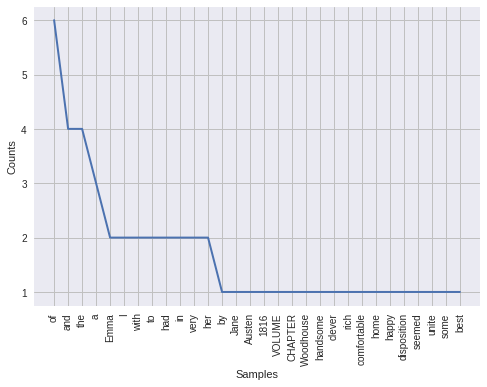

In [90]:
a.plot(30)

**dispersion_plot**은 단어가 어느 위치에서 사용됐는지 시각화 해줍니다.

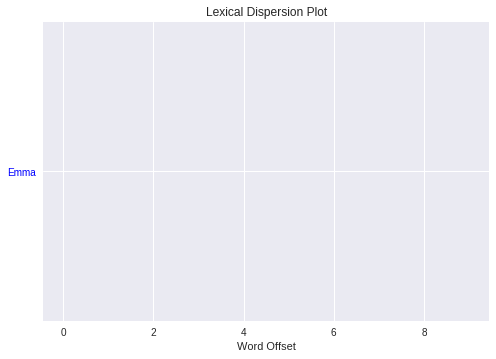

In [91]:
a.dispersion_plot(["Emma"])

### 사용빈도 뽑아내기
NLTK가 제공하는 **FreqDist**을 이용하면 특정 토큰의 사용 빈도수를 클래스에 담을 수 있습니다.

In [0]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [list[0] for list in tokens if list[1] == "NNP" and list[0] not in stopwords]
fd_names = FreqDist(names_list)

In [81]:
##전체 단어 개수
print(fd_names.N())
##emma 단어 출현 개수
print(fd_names["Emma"])
##emma 단어 출현 빈도(확률)
print(fd_names.freq("Emma"))
##가장 높은 빈도수 단어 추출
print(fd_names.most_common(5))

7863
830
0.10555767518758744
[('Emma', 830), ('Harriet', 491), ('Weston', 439), ('Knightley', 389), ('Elton', 385)]


## 워드클라우드
빈도수가 높은 단어들로 워드클라우드를 만들 수 있습니다. 워드클라우드는 **wordcloud**라는 파이썬 라이브러리가 제공합니다. 워드클라우드를 렌더링(**imshow()**)하기 위해서 NLTK의 freqDist 형의 데이터가 들어가야 합니다.

In [83]:
type(fd_names)

nltk.probability.FreqDist

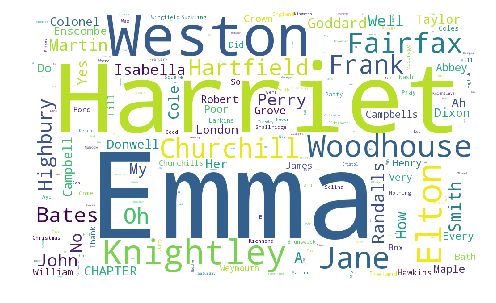

In [88]:
import matplotlib.pylab as plt
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
##freqDist형의 데이터가 들어가야 한다.
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()